Homework

In this homework, we'll deploy Credit Card prediction model from the homework 5. We already have a docker image for this model - we'll use it for deploying the model to Kubernetes.
Bulding the image

Clone the course repo if you haven't:

git clone https://github.com/alexeygrigorev/mlbookcamp-code.git

Go to the course-zoomcamp/cohorts/2022/05-deployment/homework folder and execute the following:

docker build -t zoomcamp-model:v001 .

    Note: If you have troubles building the image, you can use the image we built and published to docker hub: svizor42/zoomcamp-model:v001

Question 1

Run it to test that it's working locally:

docker run -it --rm -p 9696:9696 zoomcamp-model:v001

And in another terminal, execute q6_test.py file:

python q6_test.py

You should see this:

{'get_card': True, 'get_card_probability': <value>}

Here <value> is the probability of getting a credit card. You need to choose the right one.

- 0.289
- 0.502
- **0.769**
- 0.972

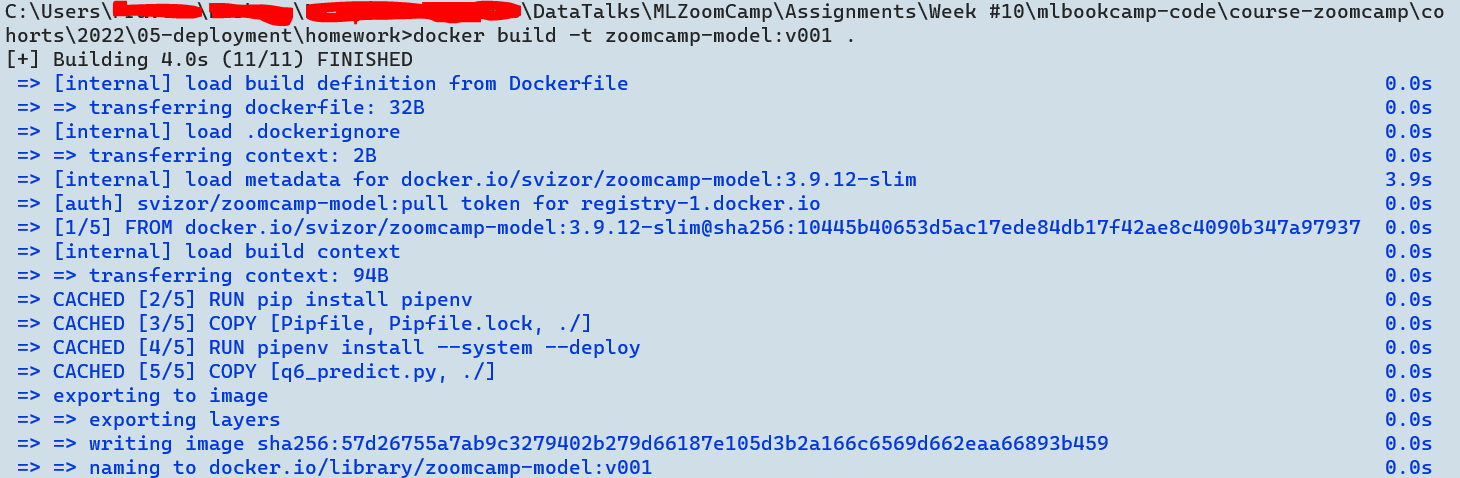

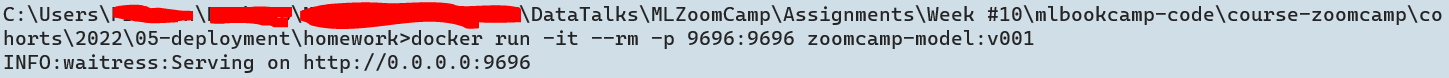

In [1]:
!python q6_test.py

{'get_card': True, 'get_card_probability': 0.7692649226628628}


Now you can stop the container running in Docker.
Installing kubectl and kind

You need to install:

    kubectl - https://kubernetes.io/docs/tasks/tools/ (you might already have it - check before installing)
    kind - https://kind.sigs.k8s.io/docs/user/quick-start/

In [2]:
!kubectl version  

Client Version: version.Info{Major:"1", Minor:"25", GitVersion:"v1.25.2", GitCommit:"5835544ca568b757a8ecae5c153f317e5736700e", GitTreeState:"clean", BuildDate:"2022-09-21T14:33:49Z", GoVersion:"go1.19.1", Compiler:"gc", Platform:"windows/amd64"}
Kustomize Version: v4.5.7


Unable to connect to the server: dial tcp [::1]:8080: connectex: No connection could be made because the target machine actively refused it.


In [3]:
!choco install kind

Chocolatey v1.2.0
Installing the following packages:
kind
By installing, you accept licenses for the packages.
kind v0.17.0 already installed.
 Use --force to reinstall, specify a version to install, or try upgrade.

Chocolatey installed 0/1 packages. 
 See the log for details (C:\ProgramData\chocolatey\logs\chocolatey.log).

Warnings:
 - kind - kind v0.17.0 already installed.
 Use --force to reinstall, specify a version to install, or try upgrade.


Question 2

What's the version of kind that you have?

Use kind --version to find out.



In [4]:
!kind --version

kind version 0.17.0


Creating a cluster

Now let's create a cluster with kind:

kind create cluster

And check with kubectl that it was successfully created:

kubectl cluster-info

In [5]:
!kind create cluster

Creating cluster "kind" ...
 â€¢ Ensuring node image (kindest/node:v1.25.3) ðŸ–¼  ...
 âœ“ Ensuring node image (kindest/node:v1.25.3) ðŸ–¼
 â€¢ Preparing nodes ðŸ“¦   ...
 âœ“ Preparing nodes ðŸ“¦ 
 â€¢ Writing configuration ðŸ“œ  ...
 âœ“ Writing configuration ðŸ“œ
 â€¢ Starting control-plane ðŸ•¹ï¸�  ...
 âœ“ Starting control-plane ðŸ•¹ï¸�
 â€¢ Installing CNI ðŸ”Œ  ...
 âœ“ Installing CNI ðŸ”Œ
 â€¢ Installing StorageClass ðŸ’¾  ...
 âœ“ Installing StorageClass ðŸ’¾
Set kubectl context to "kind-kind"
You can now use your cluster with:

kubectl cluster-info --context kind-kind

Thanks for using kind! ðŸ˜Š


In [6]:
!kubectl cluster-info

Kubernetes control plane is running at https://127.0.0.1:26168
CoreDNS is running at https://127.0.0.1:26168/api/v1/namespaces/kube-system/services/kube-dns:dns/proxy

To further debug and diagnose cluster problems, use 'kubectl cluster-info dump'.


Question 3

What's the smallest deployable computing unit that we can create and manage in Kubernetes (kind in our case)?

- Node
- **Pod**
- Deployment
- Service

Question 4

Now let's test if everything works. Use kubectl to get the list of running services.

What's the Type of the service that is already running there?

- **ClusterIP**
- NodePort
- LoadBalancer
- ExternalName

In [7]:
!kubectl get service

NAME         TYPE        CLUSTER-IP   EXTERNAL-IP   PORT(S)   AGE
kubernetes   ClusterIP   10.96.0.1    <none>        443/TCP   79s


Question 5

To be able to use the docker image we previously created (zoomcamp-model:v001), we need to register it with kind.

What's the command we need to run for that?

- kind create cluster
- kind build node-image
- **kind load docker-image**
- kubectl apply

In [8]:
!kind load docker-image zoomcamp-model:v001

Image: "" with ID "sha256:57d26755a7ab9c3279402b279d66187e105d3b2a166c6569d662eaa66893b459" not yet present on node "kind-control-plane", loading...


Question 6

Now let's create a deployment config (e.g. deployment.yaml):

    apiVersion: apps/v1
    kind: Deployment
    metadata:
      name: credit-card
    spec:
      selector:
        matchLabels:
          app: credit-card
      replicas: 1
      template:
        metadata:
          labels:
            app: credit-card
        spec:
          containers:
          - name: credit-card
            image: <Image>
            resources:
              requests:
                memory: "64Mi"
                cpu: "100m"            
              limits:
                memory: <Memory>
                cpu: <CPU>
            ports:
            - containerPort: <Port>

Replace Image, Memory, CPU, Port with the correct values. 

What is the value for Port  ? 

***9696***

Apply this deployment using the appropriate command and get a list of running Pods. You can see one running Pod.

In [9]:
!kubectl apply -f deployment.yaml

deployment.apps/credit-card created


In [10]:
!kubectl get deployment

NAME          READY   UP-TO-DATE   AVAILABLE   AGE
credit-card   1/1     1            1           2s


In [11]:
!kubectl get pod

NAME                           READY   STATUS    RESTARTS   AGE
credit-card-854fcccb98-qd8wh   1/1     Running   0          3s


In [12]:
!kubectl get service

NAME         TYPE        CLUSTER-IP   EXTERNAL-IP   PORT(S)   AGE
kubernetes   ClusterIP   10.96.0.1    <none>        443/TCP   4m26s


Question 7

Let's create a service for this deployment (service.yaml):

    apiVersion: v1
    kind: Service
    metadata:
      name: < Service name >
    spec:
      type: LoadBalancer
      selector:
        app: < ??? >
      ports:
      - port: 80
        targetPort: < PORT >


Fill it in. What do we need to write instead of < ??? > ?

Apply this config file.**< Service Name > = credit-card-service, < ??? > = credit-card and < PORT > = 9696**

In [13]:
!kubectl apply -f service.yaml

service/credit-card-service created


In [14]:
!kubectl get deployment

NAME          READY   UP-TO-DATE   AVAILABLE   AGE
credit-card   1/1     1            1           2m17s


In [15]:
!kubectl get pod

NAME                           READY   STATUS    RESTARTS   AGE
credit-card-854fcccb98-qd8wh   1/1     Running   0          2m18s


In [16]:
!kubectl get service

NAME                  TYPE           CLUSTER-IP      EXTERNAL-IP   PORT(S)        AGE
credit-card-service   LoadBalancer   10.96.254.215   <pending>     80:32436/TCP   5s
kubernetes            ClusterIP      10.96.0.1       <none>        443/TCP        6m42s



We can test our service locally by forwarding the port 9696 on our computer to the port 80 on the service:

`
kubectl port-forward service/<Service name> 9696:80
`

Run q6_test.py (from the homework 5) once again to verify that everything is working. You should get the same result as in Question 1.




Run kubectl port-forward service/credit-card-service 9696:80 in another terminal indefinitely

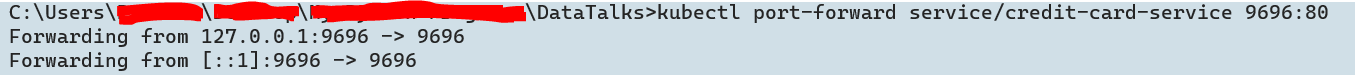

In [17]:
!python q6_test.py

{'get_card': True, 'get_card_probability': 0.7692649226628628}


 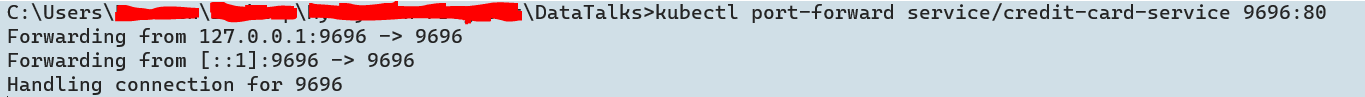

Autoscaling

Now we're going to use a HorizontalPodAutoscaler (HPA for short) that automatically updates a workload resource (such as our deployment), with the aim of automatically scaling the workload to match demand.


Use the following command to create the HPA:

`kubectl autoscale deployment credit-card --name credit-card-hpa --cpu-percent=20 --min=1 --max=3`

You can check the current status of the new HPA by running:

`kubectl get hpa`

The output should be similar to the next:

```
NAME              REFERENCE                TARGETS   MINPODS   MAXPODS   REPLICAS   AGE
credit-card-hpa   Deployment/credit-card   1%/20%    1         3         1          27s
```

TARGET column shows the average CPU consumption across all the Pods controlled by the corresponding deployment. Current CPU consumption is about 0% as there are no clients sending requests to the server.

    Note: In case the HPA instance doesn't run properly, try to install the latest Metrics Server release from the components.yaml manifest:

```bash
kubectl apply -f https://github.com/kubernetes-sigs/metrics-server/releases/latest/download/components.yaml
```

In [18]:
!kubectl autoscale deployment credit-card --name credit-card-hpa --cpu-percent=20 --min=1 --max=3

horizontalpodautoscaler.autoscaling/credit-card-hpa autoscaled


In [19]:
!kubectl get hpa

NAME              REFERENCE                TARGETS         MINPODS   MAXPODS   REPLICAS   AGE
credit-card-hpa   Deployment/credit-card   <unknown>/20%   1         3         0          1s


Increase the load

Let's see how the autoscaler reacts to increasing the load. To do this, we can slightly modify the existing q6_test.py script by putting the operator that sends the request to the credit-card service into a loop.


    while True:
        sleep(0.1)
        response = requests.post(url, json=client).json()
        print(response) 
 
Now you can run this script.

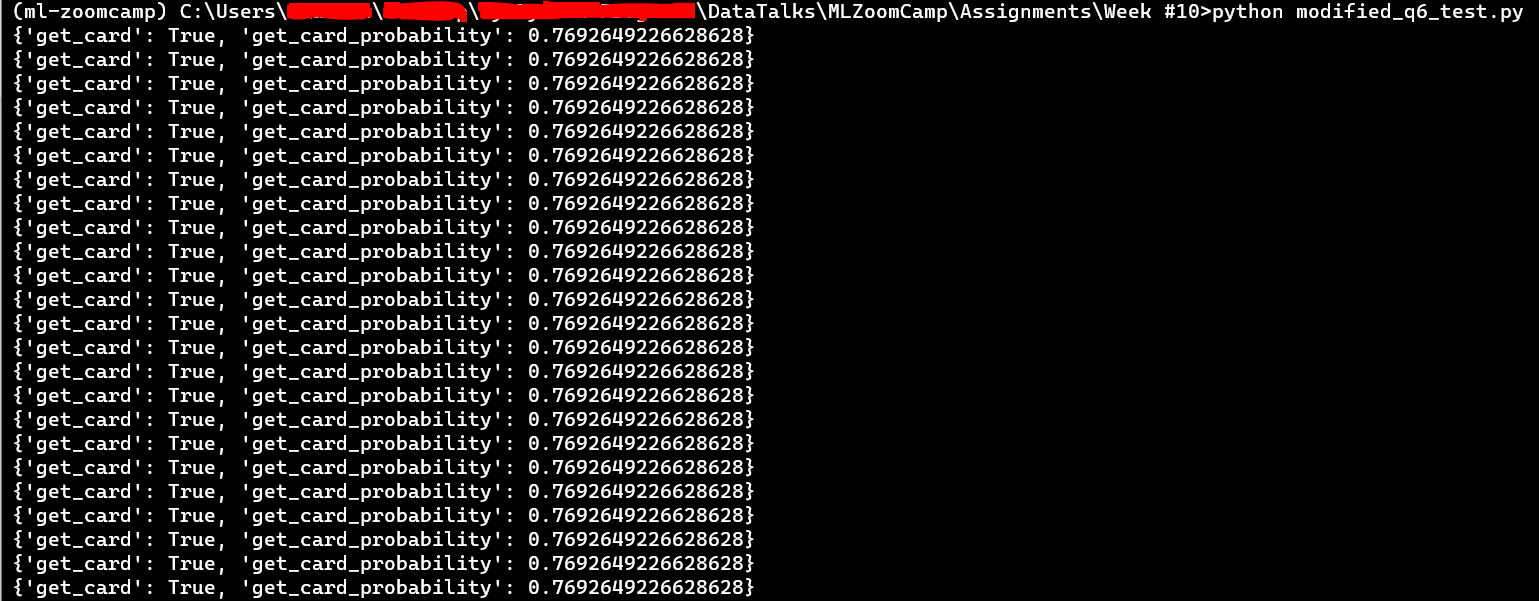

Run the modified_q6_test.py in a separate terminal

Question 8 (optional)

Run kubectl get hpa credit-card-hpa --watch command to monitor how the autoscaler performs. Within a minute or so, you should see the higher CPU load; and then - more replicas. What was the maximum amount of the replicas during this test?

- **1**
- 2
- 3
- 4

    Note: It may take a few minutes to stabilize the number of replicas. Since the amount of load is not controlled in any way it may happen that the final number of replicas will differ from initial.

Run the command kubectl get hpa credit-card-hpa --watch in another terminal

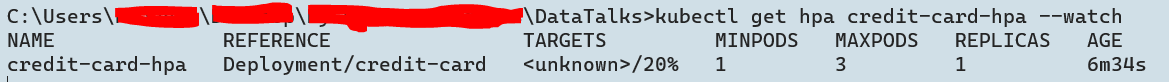